# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'        # saved into the project folder
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [129]:
# sure to want numpy at some point here...
import numpy as np


In [3]:
## Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (len(X_train[0]), len(X_train[0][0]), len(X_train[0][0][0]))
# The above makes the assumption that all images in the training data are the same size.
# This is a reasonable assumption, as this should be taken care of when preparing the training data

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))
# The above makes the assumption that the training set contains examples of each class
# This is a reasonable assumption, as there wouldn't be any possibility of finding any other classes!

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

/home/neil/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


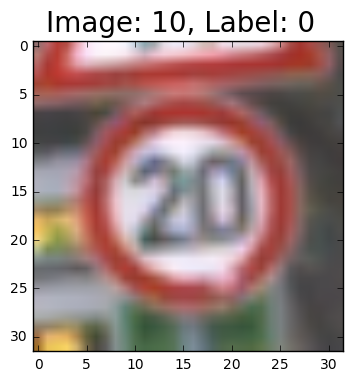

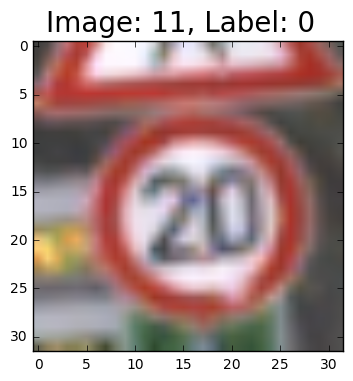

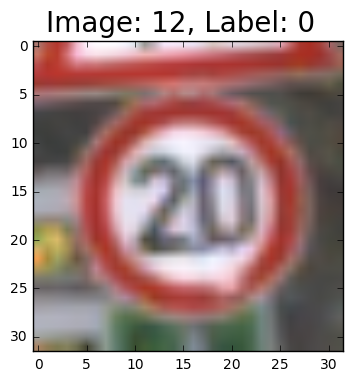

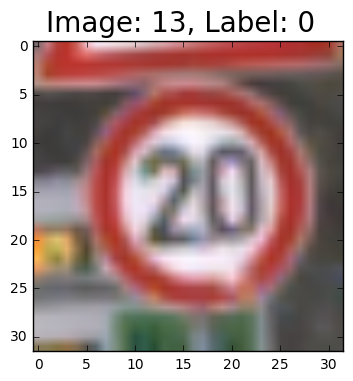

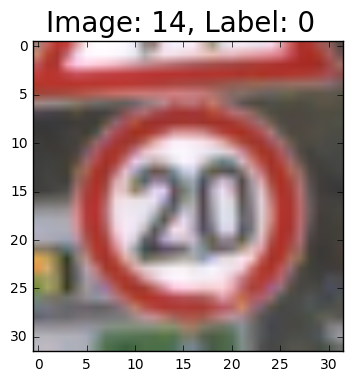

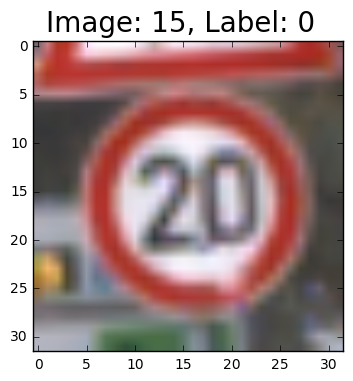

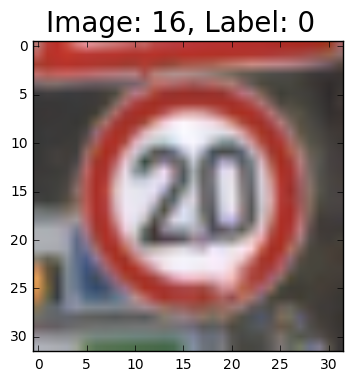

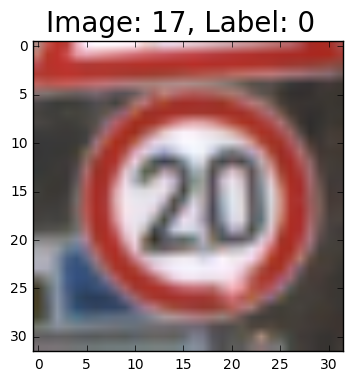

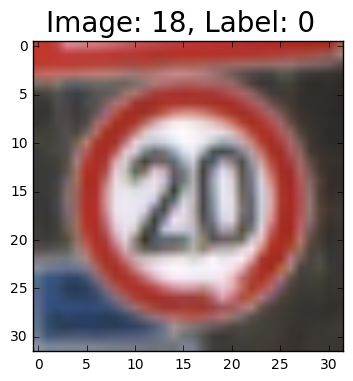

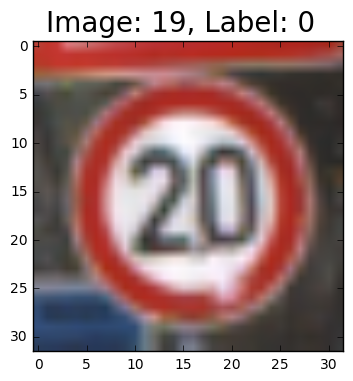

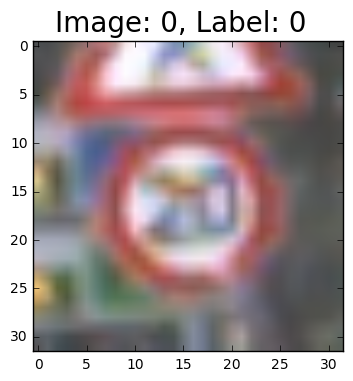

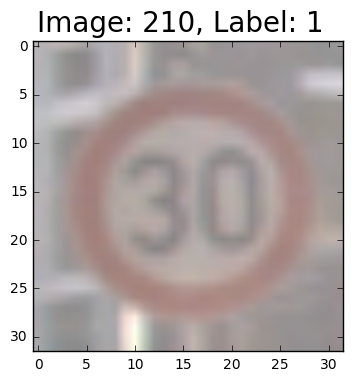

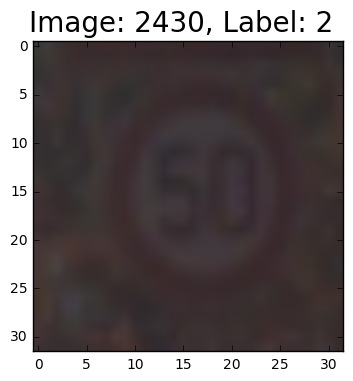

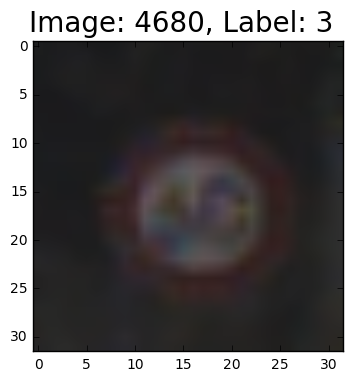

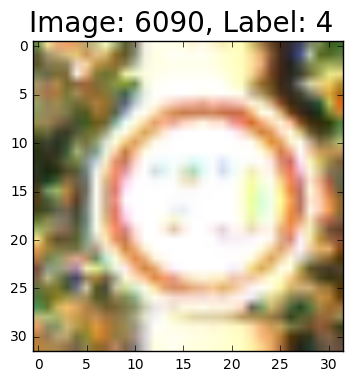

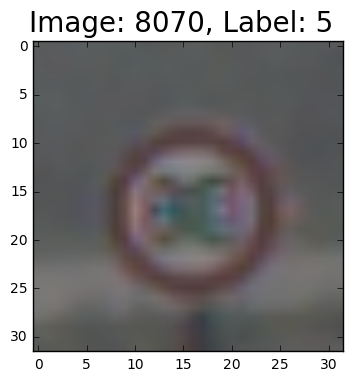

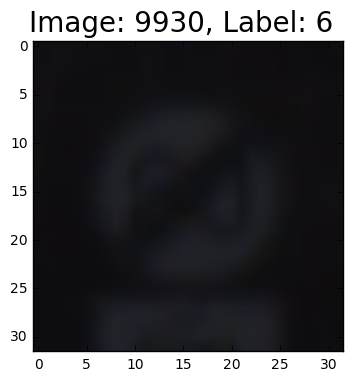

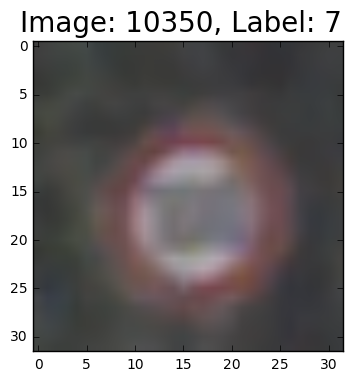

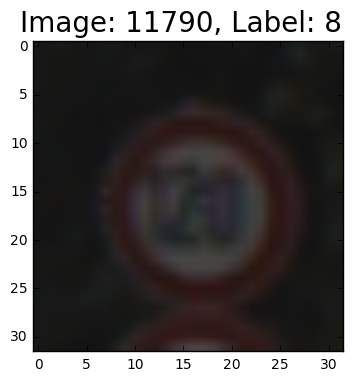

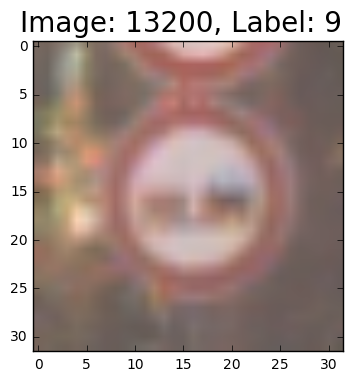

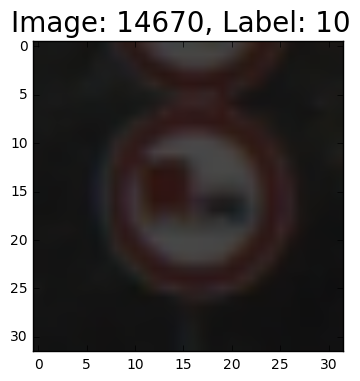

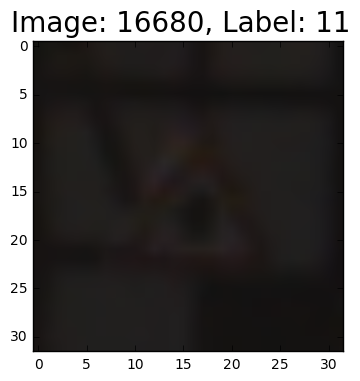

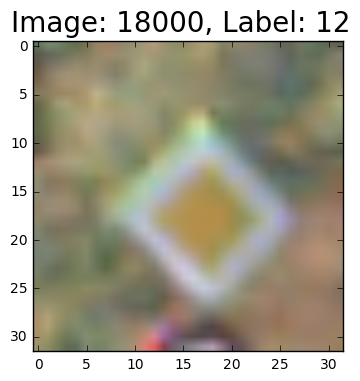

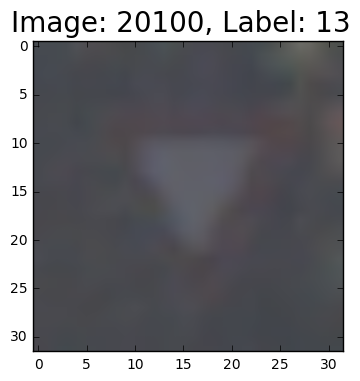

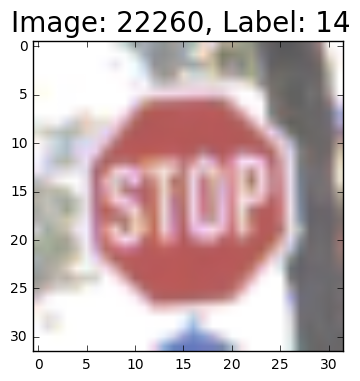

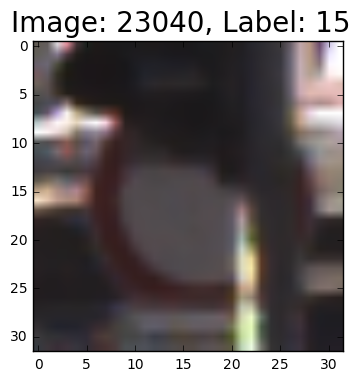

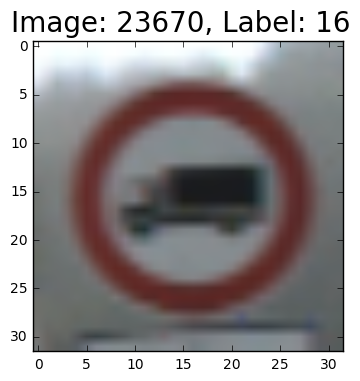

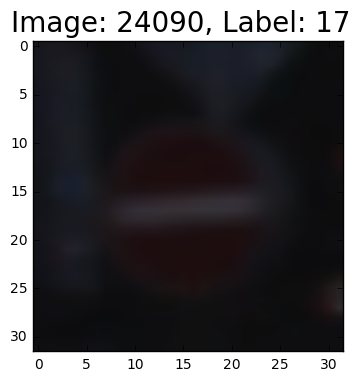

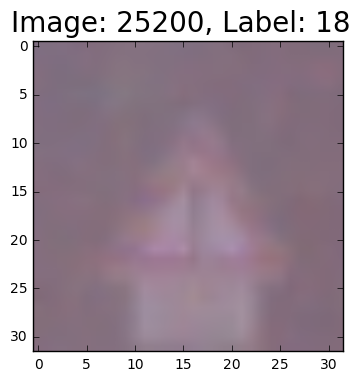

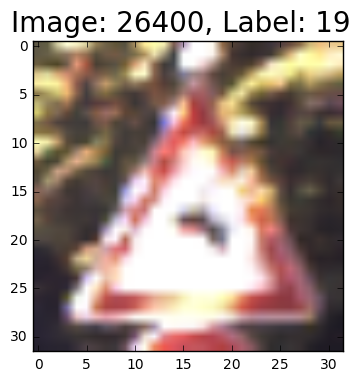

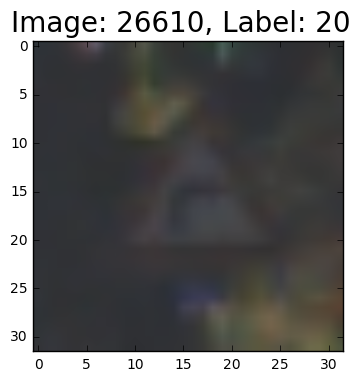

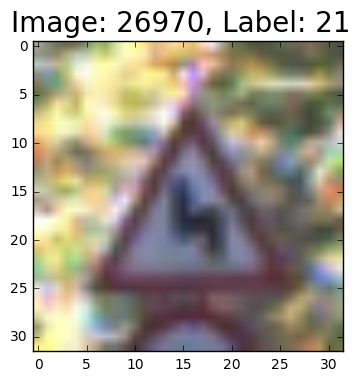

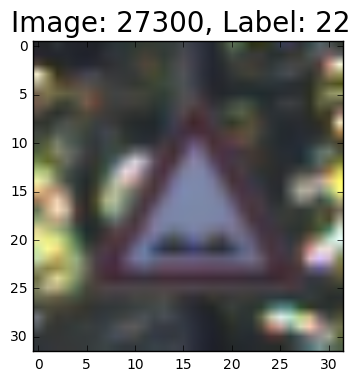

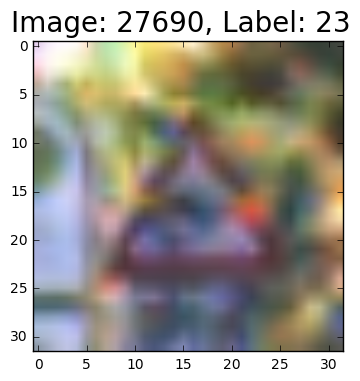

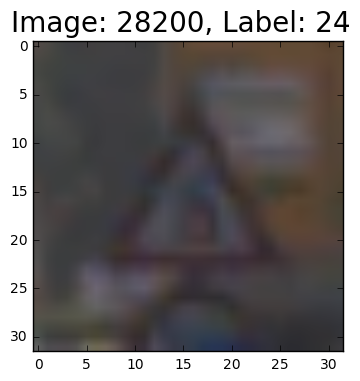

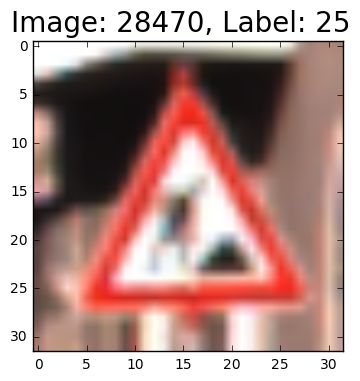

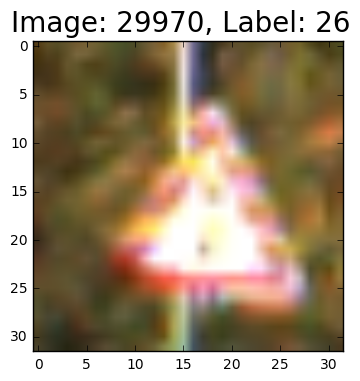

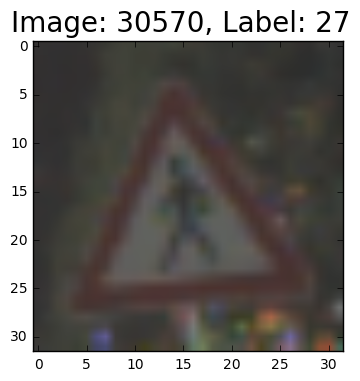

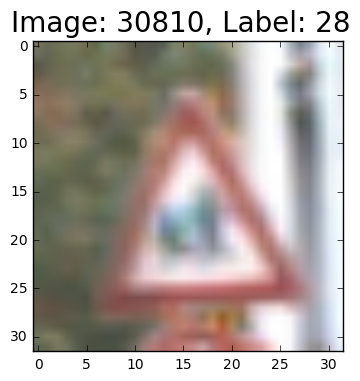

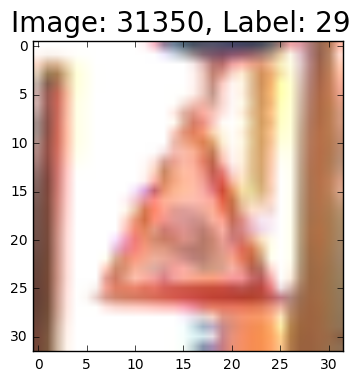

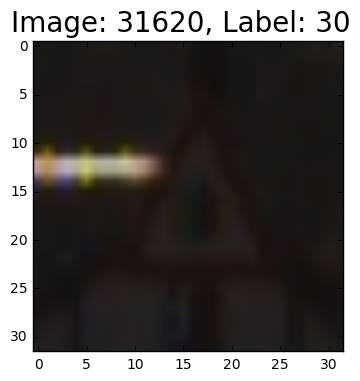

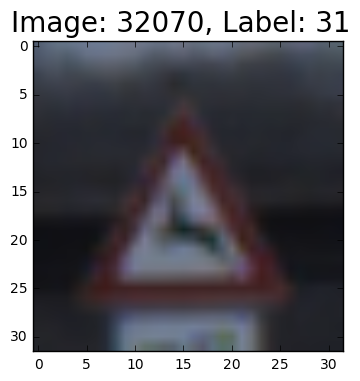

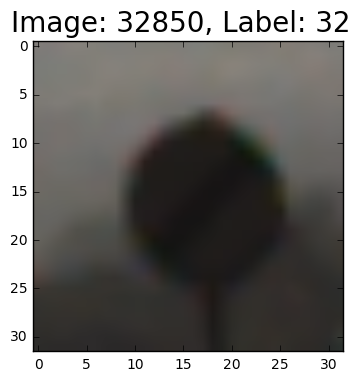

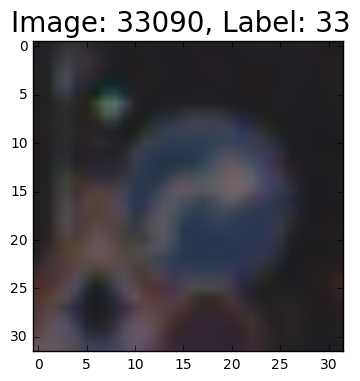

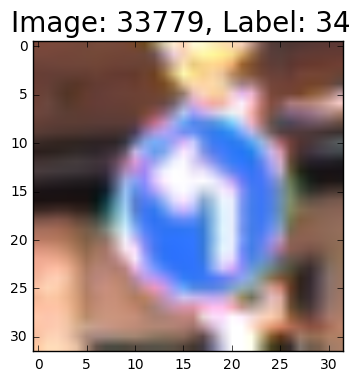

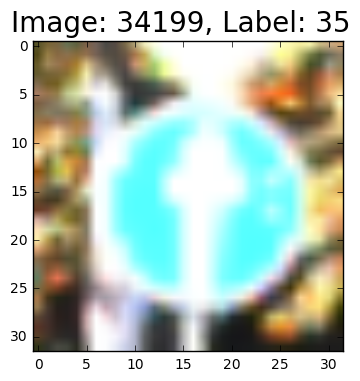

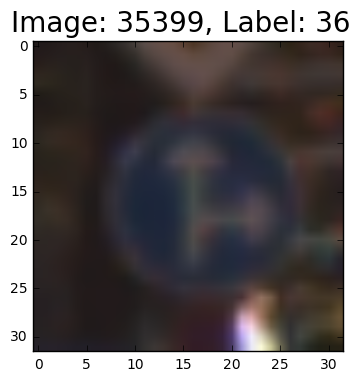

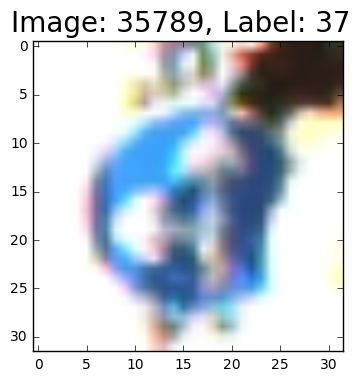

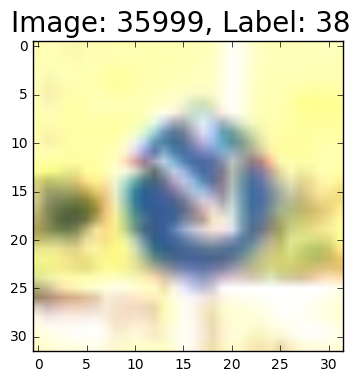

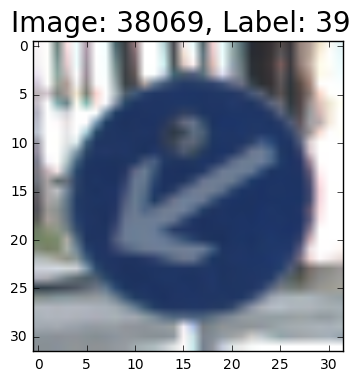

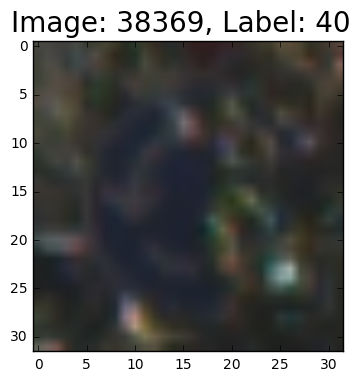

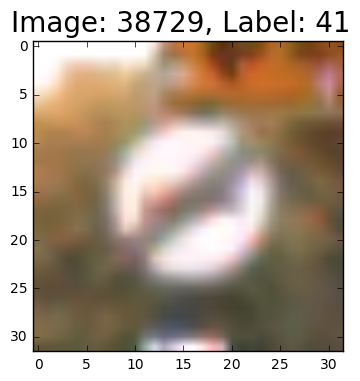

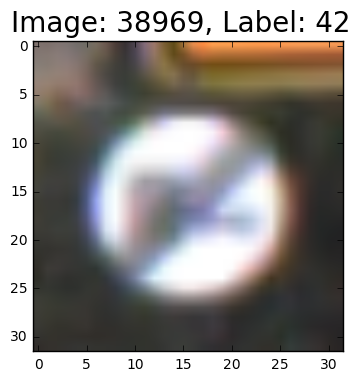

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Let's take a look at some of the first images (10-20)

for i in range(10,20):
    image = X_train[i]
    fig = plt.figure()
    fig.suptitle('Image: ' + str(i) + ', Label: ' + str(y_train[i]), fontsize=20)
    plt.imshow(image)

# Now let's take a look at an example of each label
i = 0
while i < n_classes:
    n = 0
    while n < n_train:
        # find the first image which matches the i-th class
        if y_train[n] == i:
            # found one
            image = X_train[n]
            fig = plt.figure()
            fig.suptitle('Image: ' + str(n) + ', Label: ' + str(y_train[n]), fontsize=20)
            plt.imshow(image)
            i += 1
            n = n_train
        else:
            n += 1


In [6]:
# encapsulate the counting/order checking in a function 
def nm_count_check_order(training_images, training_classes, print_counts=True):
    class_count = len(set(training_classes))
    image_count = len(training_images)
    counts = []
    for i in range(0, class_count):
        n_class_count = list(training_classes).count(i)
        n_first_occurrence = 0
        n_last_occurrence = len(training_images)
        n = 0
        while n < image_count:
            if training_classes[n] == i:
                n_first_occurrence = n
                n = image_count
            else:
                n += 1
        n = image_count - 1
        while n >= 0:
            if training_classes[n] == i:
                n_last_occurrence = n
                n = -1
            else:
                n -= 1
        counts += [n_class_count]
        if print_counts:
            print('Class: ' + str(i) + ', count: ' + str(n_class_count) + ', first : ' + str(n_first_occurrence) + ', last: ' + str(n_last_occurrence))
    return counts

# run the count checking
counts = nm_count_check_order(X_train, y_train, False)
print('Counts of each class: ', counts)


Counts of each class:  [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


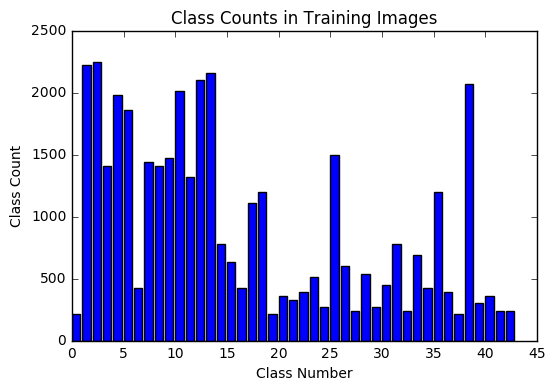

In [7]:
N = len(counts)
x = range(N)

fig = plt.figure()
ax = plt.subplot()
plt.bar(x, counts)
ax.set_ylabel('Class Count')
ax.set_xlabel('Class Number')
ax.set_title('Class Counts in Training Images')


# Notes on data exploration and findings
The images are provided in an order of ascending classification - will need to shuffle for training, which I expect will be done when splitting out a validation set prior to training.

There is a large variation in the counts for each class.  Some classes have >2000 examples, some classes don't have all that many examples (e.g. 210 for class 37, 240 for class 42).  Does this affect model accuracy and would a larger training set be required for a real-world self-driving car?  

In terms of this modelling exercise, there are 2 aspects to the training set being unbalanced.  First, the relative frequency of examples may be a reflection of the incidence of signs in the real world. If this is the case, preserving the relative frequency of the examples should cause the model to favour the more frequent signs in predictions - this would be a reflection of the prior probability of any one sign being one of the more frequent types.  (E.g. if one class of sign in the world is 90% of all signs, a model which simply always guessed that sign would have a 90% chance of being correct).  

Alternatively, the relative frequencies may not reflect the real world precisely and using the training set 'as-is' would therefore disadvantage those classes which appear infrequently.  And classes with few training examples will not train well.  This can be addressed by applying some affine translations to images in the classes with few examples - e.g. a selection of rotations or small translations, which will generate new examples for those classes. These new images can then be added into the training set to augment the training data for classes with a low number of examples.

With regard to image quality, there is a variety of levels of brightness - some images very bright, some very dark. It may aid model building if these inputs were to be normalised in a pre-processing step.

Finally, are there really only 43 types of road sign in Germany?  The United Kingdom Highway Code has 100's...


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Helper functions

The exploration suggests that some pre-processing will be required for image brightness and some additional images will need to be created.

The following cells add (and test) helper functions which create new images (via small rotations) and use the skimage library to equalise image brightness.

Functions:

rotate_image   : rotate an input image 

equalise_image : equalise the image levels 


Image dimensions : 32 , 32


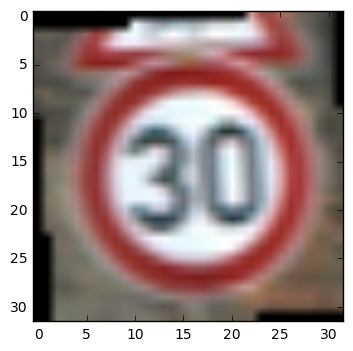

In [8]:
# The set of images is quite unbalanced
# To create more balance, we will add some more images
# These images will be drawn from the existing set, but made slightly different by a small rotation

# Helper function to provide image rotation - note that we want a 32x32 image to be returned in each case
from scipy import ndimage

n_height = 32
n_width  = 32
def rotate_image(in_image, degree=5, n_height=32, n_width=32):
    # rotate an image and return at the size defined by n_height x n_width
    # do the resize by trimming, as the rotate is going to add black pixels - *don't* want to use a rescale operation
    rotated = ndimage.rotate(in_image, degree)
    n_new_width = len(rotated[0])
    n_new_height = len(rotated[1])
    if n_new_width > n_width:
        n_start_width = int((n_new_width - n_width) / 2)
    else:
        n_start_width = 0
    if n_new_height > n_height:
        n_start_height = int((n_new_height - n_height) / 2)
    else:
        n_start_height = 0
    rotated = rotated[n_start_width:n_start_width+n_width, n_start_height:n_start_height+n_height]
    return rotated

# quick test of rotating and returning a new image
new_image = rotate_image(X_train[1000])
plt.imshow(new_image)
print('Image dimensions :', len(new_image[0]), ',', len(new_image[1]))

/home/neil/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


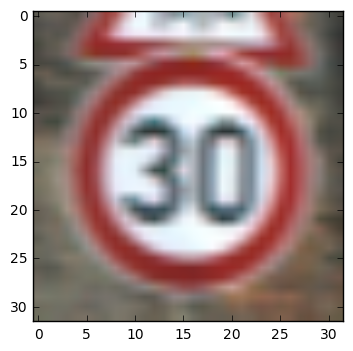

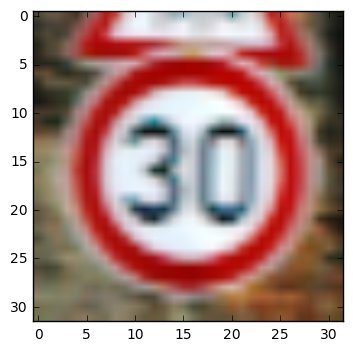

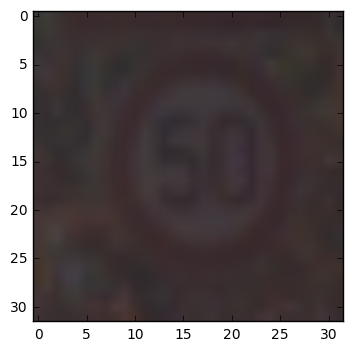

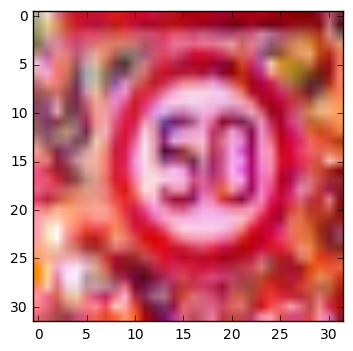

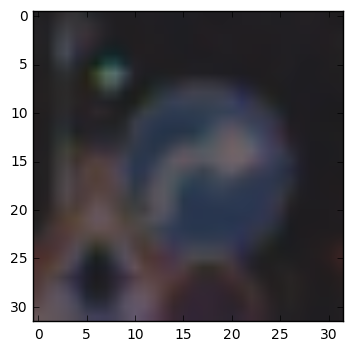

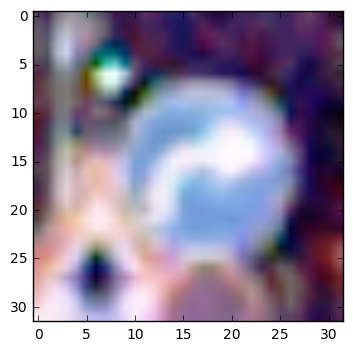

In [9]:
# image intensity equalisation - can use skimage.exposure.equalize_hist()
# Note that using this library needs a lot of faffing about with the Anaconda installation
# There are some missing links to the MKL build in Anaconda, which messes up skimage
# See http://stackoverflow.com/questions/36659453/intel-mkl-fatal-error-cannot-load-libmkl-avx2-so-or-libmkl-def-so 

from skimage import exposure
def equalise_image(i):
    return exposure.equalize_hist(i)

# Test - use an already good image
plt.figure()
plt.imshow(X_train[1000])
# Equalise the image colours
plt.figure()
img_eq = equalise_image(X_train[1000]) 
plt.imshow(img_eq)

# Test - this first image is very dark
plt.figure()
plt.imshow(X_train[2430])
# Equalise the image colours
plt.figure()
img_eq = equalise_image(X_train[2430]) 
plt.imshow(img_eq)

# Test - this first image is va blue sign
plt.figure()
plt.imshow(X_train[33090])
# Equalise the image colours
plt.figure()
img_eq = equalise_image(X_train[33090]) 
plt.imshow(img_eq)


In [10]:
# Balance out the training data
# This code creates additional images for the sparse classes, using small rotations
# We want any class to have at least 1/3 of the number of samples for the largest

def create_extra_images(training_images, training_labels):
    # Find the max count over all classes
    num_classes = len(set(training_labels))
    n_max_class_sample_size = 0 
    for i in range(0, num_classes):
        n_class_count = list(training_labels).count(i)
        if n_class_count > n_max_class_sample_size:
            n_max_class_sample_size = n_class_count
    print('Max count across all classes :', n_max_class_sample_size)

    # For each class with less than the max count of images, add some more images
    # Rotate by +/-1, +/-5, +/-10 degrees
    fFirst = True
    for i in range(0, num_classes):
        print('Processing class :', i)
        n_class_count = list(training_labels).count(i)
        n_max_to_add = n_max_class_sample_size / 3               # maximum images to add
        n_max_to_add -= n_class_count                            # less the images already present for this class
        n_index = 0
        while (n_index < len(training_images)) and (n_max_to_add > 0):
            # create some new images
            if training_labels[n_index] == i:
                # this is an image for the class we want to add into
                for degree in [1,-1,5,-5,10,-10]:
                    new_image = rotate_image(training_images[n_index],degree) # create a rotated image, assume 32x32 sizing
                    if fFirst:
                        new_images = [new_image]
                        new_labels = [i]
                        fFirst = False
                    else:
                        new_images = np.append(new_images, [new_image], axis=0)
                        new_labels = np.append(new_labels, [i], axis = 0)
                    n_max_to_add -= 1
                n_index += 1                                          # move the next image, ready to replicate that
            else:
                n_index += 1
        if (n_max_class_sample_size / 3) - n_class_count > 0:
            print('Created ', int((n_max_class_sample_size / 3) - n_class_count), ' new images')
        else:
            print('No additional images created')

    if not fFirst:
        print('Extra images created :', len(new_images))
    else:
        print('No extra images created?')
        
    return new_images, new_labels

new_images, new_labels = create_extra_images(X_train, y_train)

Max count across all classes : 2250
Processing class : 0
Created  540  new images
Processing class : 1
No additional images created
Processing class : 2
No additional images created
Processing class : 3
No additional images created
Processing class : 4
No additional images created
Processing class : 5
No additional images created
Processing class : 6
Created  330  new images
Processing class : 7
No additional images created
Processing class : 8
No additional images created
Processing class : 9
No additional images created
Processing class : 10
No additional images created
Processing class : 11
No additional images created
Processing class : 12
No additional images created
Processing class : 13
No additional images created
Processing class : 14
No additional images created
Processing class : 15
Created  120  new images
Processing class : 16
Created  330  new images
Processing class : 17
No additional images created
Processing class : 18
No additional images created
Processing class : 19

In [11]:
print(new_labels)
print(len(new_labels))

[ 0  0  0 ..., 42 42 42]
9066


Counts of each augmented class:  [750, 2220, 2250, 1410, 1980, 1860, 750, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 750, 750, 1110, 1200, 750, 750, 750, 750, 750, 750, 1500, 750, 750, 750, 750, 750, 780, 750, 755, 750, 1200, 750, 750, 2070, 750, 750, 750, 750]


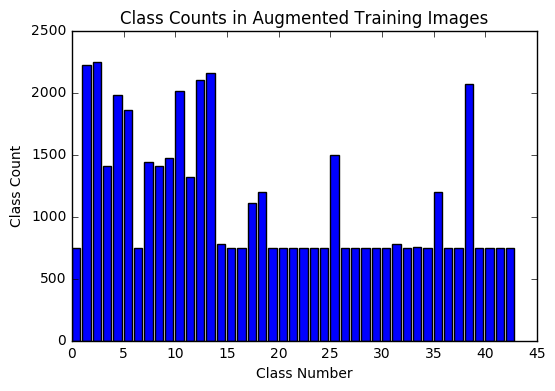

In [12]:
# Visualise what the concatenation of X_train and new_images is going to look like

conc_images = np.append(X_train, new_images, axis=0)
conc_labels = np.append(y_train, new_labels, axis=0)

counts = nm_count_check_order(conc_images, conc_labels, False)
print('Counts of each augmented class: ', counts)

N = len(counts)
x = range(N)

fig = plt.figure()
ax = plt.subplot()
plt.bar(x, counts)
ax.set_ylabel('Class Count')
ax.set_xlabel('Class Number')
ax.set_title('Class Counts in Augmented Training Images')



### Now want to create some alternative sets of training data (to use for comparative models)

Set #1: The original X_train, y_train sets

Set #2: The original X_train, y_train sets, with pre-processing to balance the brightness

Set #3: The original X_train, y_train sets, augmented with additional images for the sparse classes

Set #4: The augmented set (additional images), with image brightness balancing

These options will allow the network to be trained on each and the validation accuracies of each run compared.

Note that when augmenting the data with additional images, we want to take a validation set from the original set of images before creating the augmentation.  This will avoid running validations on copies of images which are in the training set.


In [13]:
# Helper function to split out some training and validation data
# Note that this is just a slice at this stage and isn't yet randomising the order of the training samples
# Reason for putting this in place early is that some of the sets will take validation data before augmenting
# the training set - to avoid having near-duplicate images in the training and validation sets.

def train_validation_split(image_array, label_array, train_percent=0.8):
    n = int(len(image_array) * train_percent)
    train_i = image_array[:n]
    valid_i = image_array[n:]
    train_l = label_array[:n]
    valid_l = label_array[n:]
    return train_i, train_l, valid_i, valid_l


In [14]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# At this stage have inputs of:
# X_train - initial input images
# y_train - labels for those initial images
# Both sets neatly ordered by class label (ascending)

from sklearn.utils import shuffle

# Set #1: as given
training_images_1, training_labels_1 = shuffle(X_train, y_train)
training_images_1, training_labels_1, validation_images_1, validation_labels_1 = train_validation_split(training_images_1, training_labels_1, 0.9)
print('Size of basic training set   : ', len(training_images_1))
print('Size of basic validation set : ', len(validation_images_1))

# Set #2: apply the brightness function to all of the images in the first set
# using the already-shuffled set means that the validation set will be the same - better comparison
training_images_2 = []
training_labels_2 = []
validation_images_2 = []
validation_labels_2 = []
for idx in range(len(training_images_1)):
    training_images_2.append(equalise_image(training_images_1[idx]))
    training_labels_2.append(training_labels_1[idx])
print('Size of brightness-adjusted training set: ', len(training_images_2))
for idx in range(len(validation_images_1)):
    validation_images_2.append(equalise_image(validation_images_1[idx]))
    validation_labels_2.append(validation_labels_1[idx])
print('Size of brightness-adjusted validation set: ', len(validation_images_2))
      
# Set #3: use the existing set of validation data, then append on some additional images to the training set
# First create some extra images, from the training set for set #1
new_images_3, new_labels_3 = create_extra_images(training_images_1, training_labels_1)
training_images_3 = np.append(training_images_1, new_images_3, axis=0)
training_labels_3 = np.append(training_labels_1, new_labels_3, axis=0)
# Need to give these another shuffle
training_images_3, training_labels_3 = shuffle(training_images_3, training_labels_3)
# Can just use a copy of the set #1 validation images
validation_images_3 = validation_images_1
validation_labels_3 = validation_labels_1
print('Size of augmented training set   : ', len(training_images_3))
print('Size of augmented validation set : ', len(validation_images_3))

# Set #4: apply the brightness equalisation function to all of the images in the third set
# All of the images are already shuffled and the set augmented etc
training_images_4 = []
training_labels_4 = []
validation_images_4 = []
validation_labels_4 = []
for idx in range(len(training_images_3)):
      training_images_4.append(equalise_image(training_images_3[idx]))
      training_labels_4.append(training_labels_3[idx])
print('Size of brightness-adjusted and augmented training set: ', len(training_images_4))
for idx in range(len(validation_images_3)):
      validation_images_4.append(equalise_image(validation_images_3[idx]))
      validation_labels_4.append(validation_labels_3[idx])
print('Size of brightness-adjusted and augmented validation set: ', len(validation_images_4))


Size of basic training set   :  35288
Size of basic validation set :  3921


/home/neil/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


Size of brightness-adjusted training set:  35288
Size of brightness-adjusted validation set:  3921
Max count across all classes : 2000
Processing class : 0
Created  481  new images
Processing class : 1
No additional images created
Processing class : 2
No additional images created
Processing class : 3
No additional images created
Processing class : 4
No additional images created
Processing class : 5
No additional images created
Processing class : 6
Created  287  new images
Processing class : 7
No additional images created
Processing class : 8
No additional images created
Processing class : 9
No additional images created
Processing class : 10
No additional images created
Processing class : 11
No additional images created
Processing class : 12
No additional images created
Processing class : 13
No additional images created
Processing class : 14
No additional images created
Processing class : 15
Created  112  new images
Processing class : 16
Created  280  new images
Processing class : 17
No

In [15]:
# Check that the training data is now shuffled
# Should not see an increasing first/last image sequence over the classes any more

nm_count_check_order(training_images_1, training_labels_1)


Class: 0, count: 185, first : 203, last: 35057
Class: 1, count: 2000, first : 31, last: 35285
Class: 2, count: 1991, first : 1, last: 35249
Class: 3, count: 1278, first : 8, last: 35225
Class: 4, count: 1785, first : 10, last: 35264
Class: 5, count: 1653, first : 12, last: 35262
Class: 6, count: 379, first : 70, last: 35273
Class: 7, count: 1279, first : 37, last: 35281
Class: 8, count: 1272, first : 26, last: 35242
Class: 9, count: 1313, first : 5, last: 35279
Class: 10, count: 1845, first : 3, last: 35179
Class: 11, count: 1194, first : 72, last: 35232
Class: 12, count: 1888, first : 36, last: 35283
Class: 13, count: 1947, first : 0, last: 35287
Class: 14, count: 714, first : 47, last: 35154
Class: 15, count: 554, first : 27, last: 35282
Class: 16, count: 386, first : 100, last: 35259
Class: 17, count: 995, first : 113, last: 35261
Class: 18, count: 1083, first : 29, last: 35255
Class: 19, count: 190, first : 167, last: 35199
Class: 20, count: 325, first : 17, last: 35201
Class: 21, 

[185,
 2000,
 1991,
 1278,
 1785,
 1653,
 379,
 1279,
 1272,
 1313,
 1845,
 1194,
 1888,
 1947,
 714,
 554,
 386,
 995,
 1083,
 190,
 325,
 304,
 357,
 451,
 241,
 1354,
 534,
 213,
 480,
 244,
 403,
 705,
 210,
 620,
 376,
 1090,
 348,
 195,
 1877,
 266,
 327,
 219,
 218]

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
My aim is to start with the LeNet example architecture, which requires the data to be in a certain format.

The images are in a 32x32x3 format.  32x32 is the image size which the example LeNet process accepts and I'm planning to use that architecture as at least the starting point for my model - so there's nothing to do in terms of changing the size of images (i.e. no need for any padding).  

LeNet uses depth 1 images (greyscale), but colour is important for traffic sign classification, so I'm going to keep this at depth 3.

However, there are 2 points arising from the investigation into the supplied training data - the numbers of example images in each class of sign and the contrast/brightness of the images.

First, the low numbers of images in some classes are a cause for concern. This may be useful information in terms of the relative probabilities of each sign, but may also be an issue for training the model (insufficient samples for the sparse classes). To address this, it is possible to create additional examples images via transformations of some existing images (affine transformations, such as rotation).

Second, the training images are provided with a range of brightnesses - potentially reflecting differing lighting conditions under which the images were captured.  This can be addressed by equalisation of the lighting levels within each image.

Clearly, there is the option to combine these pre-processing actions.  As I don't know whether the pre-processing will positively or negatively impact the model predictive accuracy, I have chosen to provide a training and validation set for each of the combinations:

Set 1: the training data, as provided.

Set 2: the training data, with image light levels balanced

Set 3: the training data, augmented with additional images created from the samples using small rotations

Set 4: the training data both augmented and with image brightness processing

Creating a model on each of these sets of training data and comparing validation accuracies, will allow the effect of each pre-processing step to be judged.

Note: to ensure that the comparisons are fair, the same validation set has been extracted - including extraction prior to the creation of additional images.  This ensures that there is no risk of validating with images which are only rotated copies of images used for training.  

Where the brightness equalisation transformation has been applied to training data, this transformation has also been applied to the validation set.

In [17]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Four sets of training/validation data have already been prepared, as per the discussions above

print('Set #1: basic training set - as provided')
print('Training images count   : ', len(training_images_1))
print('Validation images count : ', len(validation_images_1))
print()
print('Set #2: basic training set, with equalised image brightnesses')
print('Training images count   : ', len(training_images_2))
print('Validation images count : ', len(validation_images_2))
print()
print('Set #3: basic training set, with additional images')
print('Training images count   : ', len(training_images_3))
print('Validation images count : ', len(validation_images_3))
print()
print('Set #4: augmented set, with equalised image brightnesses')
print('Training images count   : ', len(training_images_4))
print('Validation images count : ', len(validation_images_4))
print()

Set #1: basic training set - as provided
Training images count   :  35288
Validation images count :  3921

Set #2: basic training set, with equalised image brightnesses
Training images count   :  35288
Validation images count :  3921

Set #3: basic training set, with additional images
Training images count   :  43322
Validation images count :  3921

Set #4: augmented set, with equalised image brightnesses
Training images count   :  43322
Validation images count :  3921



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
The setup of training and validation data is simply a process to split the X_train set of images into a proportion for training and a proportion for model validation.  This is done with a simple slice operation, once the images have been shuffled into random order.  Given the sizes of the data set, I've used a 90/10 split between training and validation data.  This looks to give a good size of validation set (3921) for checking of the model, whilst maximising the amount of data available for training (a common split is 80/20 training/validation - I've chosen to keep a little more data for training).

Note that the lesson videos suggest using sklearn.model_selection.train_test_split - I've simply chosed to achieve the same result with a slice and avoid another random shuffling of the data (which would be fine, but with two arrays I'm always concerned about the labels becoming detached from the images).  This has the added benefit that with a single shuffle operation, I can be assured that the same validation set is being used for each of the 4 test sets.

There is no need to create a test set from X_train - this has already been done and test set has been provided in the original pickle input files.

However, for final testing of models which use the image brightness equalisation, the test set should have a similar transformation applied as a pre-processing step.

Some additional data has been created for 2 of the sample sets, to increase the number of samples in the sparsely populated classes of sign.  This has been done with small rotations, simply to provide more examples for the learning process.  The difference between these augmented sets and the original is the addition of c.8,000 additional images to the sparse classes.  As described previously, care has been taken that the validation sets do not contain duplicates of the additional images used for training.

In [18]:
# Set up tensorflow
# Various global hyper-parameters to be defined here
import tensorflow as tf
from tensorflow.contrib.layers import flatten        # used for the flatten layer in the network setup

EPOCHS = 50         # Fairly standard initial setting, balancing accuracy with the length of time to train
BATCH_SIZE = 128    # Larger batches mean faster training, but may be limited by memory
mu = 0              # mean value of distribution used for random assignment of initial weights
sigma = 0.1         # standard deviation used for random assignment of initial weights - want this to be small
rate = 0.001        # learning rate, 0.001 is a good initial setting for a LeNet-type network

In [19]:
# Set up the network operations
# The input X is going to be the batch of training images
def SignIdentificationNetwork(X):
    
    # First convolutional layer - output 28x28x6 (further reduced by pooling step)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(X, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    # Activation - relu function
    conv1   = tf.nn.relu(conv1)   
    # Pooling step - get down to 14x14x6 output, using max_pool with 2x2 kernels
    conv1   = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')  
    
    # Second convolutional layer - output 10x10x16 (further reduced by pooling step)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    # Activation - relu again
    conv2   = tf.nn.relu(conv2)
    # Pooling step - get down to 5x5x16 output
    conv2   = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten step - go from 5x5x16 input to 1x400 output
    flat1   = flatten(conv2)
    
    # First fully connected layer - input 400, output 120
    full1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    full1_b = tf.Variable(tf.zeros(120))
    full1   = tf.matmul(flat1, full1_W) + full1_b
    # Activation - relu again
    full1   = tf.nn.relu(full1)
    
    # Second fully connected layer - input 120, output 84
    full2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    full2_b = tf.Variable(tf.zeros(84))
    full2   = tf.matmul(full1, full2_W) + full2_b
    # Activation - relu again
    full2   = tf.nn.relu(full2)
    
    # Third fully connected layer - input 84, output 43 (number of classes required)
    full3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    full3_b = tf.Variable(tf.zeros(43))
    logits  = tf.matmul(full2, full3_W) + full3_b
    
    return logits


In [20]:
# Set up placeholders
X = tf.placeholder(tf.float32, (None,32,32,3))      # dimensions set for 32x32x3 images
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)                       # sized for 43 output classes


In [21]:
# Set up the training pipeline and optimiser
logits = SignIdentificationNetwork(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)      # using the Adam optimiser - build in, better than SGD
training_operation = optimizer.minimize(loss_operation)

In [22]:
# Set up the evaluation function and related operations

# correct prediction if prediction matches the one-hot value
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# standard evaluation function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The architecture above is a slight modification of the LeNet architecture used for recognition of handwritten digits.  The modifications are to allow inputs of colour images and to allow for the wider output set.

## LeNet architecture
The LeNet architecture has the following layers:

1: First convolutional layer - down from 32x32x3 to 28x28x6, with RELU activation followed by pooling to 14x14x6.

2: Second convolutional layer - down to 10x10x16, with RELU activation followed by more pooling down to 5x5x16.  LeNet also has a flatten at this point, down to a single colour channel.

3: First fully connected layer - with 120 outputs.

4: Second fully connected layer - with 84 outputs.

5: Third fully connected layer - for digit-identification LeNet this is down to 10 outputs (0-9), whilst our sign identification requires 43 outputs (one for each sign class)

In [23]:
# Some time functions - useful to keep sane when waiting for the training to complete
import time

In [24]:
### Train your model here.
### Feel free to use as many code cells as needed.

# Train the model with the first training set and save out the session data

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_images_1)
    
    print('Training started, time to grab a cuppa...')
    print()
    print('Training for set #1: basic training images')
    print('Set size      : ', num_examples)
    print('Epochs        : ', EPOCHS)
    print('Batch size    : ', BATCH_SIZE)
    print('Learning rate : ', rate)
    print()
    
    for i in range(EPOCHS):
        start_epoch = time.time()
        # take a shuffled copy of the training data for each epoch
        tr_images, tr_labels = shuffle(training_images_1, training_labels_1)
        for offset in range(i, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = tr_images[offset:end], tr_labels[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_images_1, validation_labels_1)
        print('EPOCH               :', i+1, ' of ', EPOCHS)
        print('Validation accuracy :', validation_accuracy)
        print()
        
        end_epoch = time.time()
        print('Epoch processing time (secs)    : ', end_epoch - start_epoch)
        print('Total elapsed time (mins)       : ', (end_epoch - start_time)/60.0)
        print('Estimated time remaining (mins) : ', (end_epoch - start_epoch) * (EPOCHS - (i+1)) / 60.0)
        print()
        
    # save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'signs_set1')
    print('Saved model as *signs_set1*')


Training started, time to grab a cuppa...

Training for set #1: basic training images
Set size      :  35288
Epochs        :  50
Batch size    :  128
Learning rate :  0.001

EPOCH               : 1  of  50
Validation accuracy : 0.682223922727

Epoch processing time (secs)    :  17.887845754623413
Total elapsed time (mins)       :  0.30075364112854003
Estimated time remaining (mins) :  14.608407366275788

EPOCH               : 2  of  50
Validation accuracy : 0.851823514227

Epoch processing time (secs)    :  19.25080680847168
Total elapsed time (mins)       :  0.6216228087743123
Estimated time remaining (mins) :  15.400645446777343

EPOCH               : 3  of  50
Validation accuracy : 0.90359602156

Epoch processing time (secs)    :  17.161314249038696
Total elapsed time (mins)       :  0.9076705614725749
Estimated time remaining (mins) :  13.443029495080312

EPOCH               : 4  of  50
Validation accuracy : 0.919663350867

Epoch processing time (secs)    :  17.670385360717773
Tota

In [25]:
# Train the model with the second training set and save out the session data

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_images_2)
    
    print('Training started, time to grab a cuppa...')
    print()
    print('Training for set #2: basic training images, with equalised image brightnesses')
    print('Set size      : ', num_examples)
    print('Epochs        : ', EPOCHS)
    print('Batch size    : ', BATCH_SIZE)
    print('Learning rate : ', rate)
    print()
    
    for i in range(EPOCHS):
        start_epoch = time.time()
        # take a shuffled copy of the training data for each epoch
        tr_images, tr_labels = shuffle(training_images_2, training_labels_2)
        for offset in range(i, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = tr_images[offset:end], tr_labels[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_images_2, validation_labels_2)
        print('EPOCH               :', i+1, ' of ', EPOCHS)
        print('Validation accuracy :', validation_accuracy)
        print()
        
        end_epoch = time.time()
        print('Epoch processing time (secs)    : ', end_epoch - start_epoch)
        print('Total elapsed time (mins)       : ', (end_epoch - start_time)/60.0)
        print('Estimated time remaining (mins) : ', (end_epoch - start_epoch) * (EPOCHS - (i+1)) / 60.0)
        print()
        
    # save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'signs_set2')
    print('Saved model as *signs_set2*')

Training started, time to grab a cuppa...

Training for set #2: basic training images, with equalised image brightnesses
Set size      :  35288
Epochs        :  50
Batch size    :  128
Learning rate :  0.001

EPOCH               : 1  of  50
Validation accuracy : 0.814843152835

Epoch processing time (secs)    :  19.134544849395752
Total elapsed time (mins)       :  0.32257304986317953
Estimated time remaining (mins) :  15.626544960339864

EPOCH               : 2  of  50
Validation accuracy : 0.904361132805

Epoch processing time (secs)    :  17.96448278427124
Total elapsed time (mins)       :  0.6220055222511292
Estimated time remaining (mins) :  14.371586227416993

EPOCH               : 3  of  50
Validation accuracy : 0.946697270785

Epoch processing time (secs)    :  17.660322904586792
Total elapsed time (mins)       :  0.9163682500521342
Estimated time remaining (mins) :  13.833919608592987

EPOCH               : 4  of  50
Validation accuracy : 0.956388675887

Epoch processing time 

In [26]:
# Train the model with the third training set and save out the session data

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_images_3)
    
    print('Training started, time to grab a cuppa...')
    print()
    print('Training for set #3: basic training images, plus additional rotated images')
    print('Set size      : ', num_examples)
    print('Epochs        : ', EPOCHS)
    print('Batch size    : ', BATCH_SIZE)
    print('Learning rate : ', rate)
    print()
    
    for i in range(EPOCHS):
        start_epoch = time.time()
        # take a shuffled copy of the training data for each epoch
        tr_images, tr_labels = shuffle(training_images_3, training_labels_3)
        for offset in range(i, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = tr_images[offset:end], tr_labels[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_images_3, validation_labels_3)
        print('EPOCH               :', i+1, ' of ', EPOCHS)
        print('Validation accuracy :', validation_accuracy)
        print()
        
        end_epoch = time.time()
        print('Epoch processing time (secs)    : ', end_epoch - start_epoch)
        print('Total elapsed time (mins)       : ', (end_epoch - start_time)/60.0)
        print('Estimated time remaining (mins) : ', (end_epoch - start_epoch) * (EPOCHS - (i+1)) / 60.0)
        print()
        
    # save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'signs_set3')
    print('Saved model as *signs_set3*')

Training started, time to grab a cuppa...

Training for set #3: basic training images, plus additional rotated images
Set size      :  43322
Epochs        :  50
Batch size    :  128
Learning rate :  0.001

EPOCH               : 1  of  50
Validation accuracy : 0.806681968703

Epoch processing time (secs)    :  23.56844735145569
Total elapsed time (mins)       :  0.39539825121561684
Estimated time remaining (mins) :  19.247565337022145

EPOCH               : 2  of  50
Validation accuracy : 0.877072174979

Epoch processing time (secs)    :  23.3859121799469
Total elapsed time (mins)       :  0.7851910630861918
Estimated time remaining (mins) :  18.70872974395752

EPOCH               : 3  of  50
Validation accuracy : 0.926549349488

Epoch processing time (secs)    :  24.315958499908447
Total elapsed time (mins)       :  1.1904791116714477
Estimated time remaining (mins) :  19.047500824928285

EPOCH               : 4  of  50
Validation accuracy : 0.927569497258

Epoch processing time (secs)

In [27]:
# Train the model with the fourth training set and save out the session data

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_images_4)
    
    print('Training started, time to grab a cuppa...')
    print()
    print('Training for set #4: basic training images, plus additional rotated images, with equalisation')
    print('Set size      : ', num_examples)
    print('Epochs        : ', EPOCHS)
    print('Batch size    : ', BATCH_SIZE)
    print('Learning rate : ', rate)
    print()
    
    for i in range(EPOCHS):
        start_epoch = time.time()
        # take a shuffled copy of the training data for each epoch
        tr_images, tr_labels = shuffle(training_images_4, training_labels_4)
        for offset in range(i, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = tr_images[offset:end], tr_labels[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_images_4, validation_labels_4)
        print('EPOCH               :', i+1, ' of ', EPOCHS)
        print('Validation accuracy :', validation_accuracy)
        print()
        
        end_epoch = time.time()
        print('Epoch processing time (secs)    : ', end_epoch - start_epoch)
        print('Total elapsed time (mins)       : ', (end_epoch - start_time)/60.0)
        print('Estimated time remaining (mins) : ', (end_epoch - start_epoch) * (EPOCHS - (i+1)) / 60.0)
        print()
        
    # save the model
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'signs_set4')
    print('Saved model as *signs_set4*')

Training started, time to grab a cuppa...

Training for set #4: basic training images, plus additional rotated images, with equalisation
Set size      :  43322
Epochs        :  50
Batch size    :  128
Learning rate :  0.001

EPOCH               : 1  of  50
Validation accuracy : 0.788319306573

Epoch processing time (secs)    :  22.5342218875885
Total elapsed time (mins)       :  0.37809836069742836
Estimated time remaining (mins) :  18.402947874863944

EPOCH               : 2  of  50
Validation accuracy : 0.908951797691

Epoch processing time (secs)    :  21.93052077293396
Total elapsed time (mins)       :  0.7436285535494487
Estimated time remaining (mins) :  17.544416618347167

EPOCH               : 3  of  50
Validation accuracy : 0.945422085883

Epoch processing time (secs)    :  23.624918460845947
Total elapsed time (mins)       :  1.1373985171318055
Estimated time remaining (mins) :  18.50618612766266

EPOCH               : 4  of  50
Validation accuracy : 0.946187196824

Epoch pro

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The choice of optimiser was taken from the example LeNet model provision, which uses the AdamOptimiser

Adam optimiser: see https://arxiv.org/abs/1412.6980

Note that the AdamOptimiser is quite a recent development, but considered to be computationally efficient and not requiring much in the way of tuning of input parameters (a good thing!).  

Batch size and epochs were determined by trial-and-error, starting from settings found to be reasonable in previous projects.  Similarly the learning rate was defaulted to 0.001, which is a typical starting point for the Adam optimiser.

Note that the number of epochs used in the 4 runs of model training above is a compromise between accuracy and computing time, as well as potential for over-fitting.  Observation of the validation accuracy results over the 50 epochs shows that some models may be over-fitting (some drop-off in validation accuracy), whilst some may not yet be reaching the best level of performance.  However, the network does not contain any tactics to address over-fitting and therefore large epochs settings are not advisable (may not yield better results, risk over-fit).

In [28]:
# Check the model on the test set as a final appraisal of accuracy

# Have X_test, y_test as final test data

# Can load in session data and run the evaluate function on the test data

# Get back the saved state for model #1
saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set1')

    test_accuracy = sess.run(accuracy_operation, feed_dict={X: X_test, y: y_test})
print('Final Test, Set #1; basic data')
print('Test Accuracy: {}'.format(test_accuracy))

# Set #2
saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set2')

    test_accuracy = sess.run(accuracy_operation, feed_dict={X: X_test, y: y_test})
print('Final Test, Set #2; basic data, equalised images')
print('Test Accuracy: {}'.format(test_accuracy))

# Need also to equalise the test image set as a pre-processing operation
test_eq = []
for idx in range(len(X_test)):
    test_eq.append(equalise_image(X_test[idx]))
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set2')
    test_accuracy = sess.run(accuracy_operation, feed_dict={X: test_eq, y: y_test})
print('Final Test, Set #2; basic data, equalised images, equalised *test* images')
print('Test Accuracy: {}'.format(test_accuracy))
    

# Set #3
saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set3')

    test_accuracy = sess.run(accuracy_operation, feed_dict={X: X_test, y: y_test})
print('Final Test, Set #3; basic data, plus additional rotated images')
print('Test Accuracy: {}'.format(test_accuracy))

#Set #4
saver = tf.train.Saver()
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set4')

    test_accuracy = sess.run(accuracy_operation, feed_dict={X: X_test, y: y_test})
print('Final Test, Set #4; basic data, plus extra images, plus equalisation')
print('Test Accuracy: {}'.format(test_accuracy))
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_set4')
    test_accuracy = sess.run(accuracy_operation, feed_dict={X: test_eq, y: y_test})
print('Final Test, Set #4; basic data, equalised images, equalised *test* images')
print('Test Accuracy: {}'.format(test_accuracy))


Final Test, Set #1; basic data
Test Accuracy: 0.8964370489120483
Final Test, Set #2; basic data, equalised images
Test Accuracy: 0.9038796424865723


/home/neil/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


Final Test, Set #2; basic data, equalised images, equalised *test* images
Test Accuracy: 0.9337292313575745
Final Test, Set #3; basic data, plus additional rotated images
Test Accuracy: 0.9178938865661621
Final Test, Set #4; basic data, plus extra images, plus equalisation
Test Accuracy: 0.8830562233924866
Final Test, Set #4; basic data, equalised images, equalised *test* images
Test Accuracy: 0.91464763879776


## Reflections on the model test results

The models are all showing some evidence of over-fitting, as per the values below (i.e. test set accuracy lower than the validation set accuracy).

Set #1: final validation accuracy 96.8%, test set accuracy 89.6%

Set #2: final validation accuracy 98.3%, test set accuracy 93.4%

Set #3: final validation accuracy 98.0%, test set accuracy 91.8%

Set #4: final validation accuracy 98.2%, test set accuracy 91.5%

This suggests that some tactics to reduce over-fit may improve the test (real) performance of the network.  

The ADAM optimiser doesn't appear to allow L2 regularization within the optimisation, so this option isn't available (would require a different optimiser to be chosen, such as ProximalGradientDescentOptimizer, which would allow L1/L2 params - but this would require more trial-and-error work for the L2 params).  Instead, drop-out can be used on the convolutional layers to randomly drop a proportion of the inputs at each stage.  This will avoid the model becoming overly dependent on any particular training images.

Of the 4 sets of training data used (i.e. of the 4 options for pre-processing), set #2 appears to be giving the best results (brightness equalisation, but without additional images added).

In [61]:
# Add drop-out after the convolutional stages in the LeNet model
# Add L2 regularisation after the first fully connected layer

tf.reset_default_graph()

# Hyper-parameters
EPOCHS = 100 #150        # Higher than standard initial setting, sacrificing the length of time to train for accuracy
BATCH_SIZE = 128    # Larger batches mean faster training, but may be limited by memory
mu = 0              # mean value of distribution used for random assignment of initial weights
sigma = 0.1         # standard deviation used for random assignment of initial weights - want this to be small
rate = 0.001        # learning rate, 0.001 is a good initial setting for a LeNet-type network
keep = 0.5

keep_prob = tf.placeholder(tf.float32) # probability to keep units

# Set up the network operations
# The input X is going to be the batch of training images
def SignIdentificationNetwork2(X):
    
    # First convolutional layer - output 28x28x6 (further reduced by pooling step)
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(X, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
    # Activation - relu function
    conv1   = tf.nn.relu(conv1) 
    # Drop-out
    conv1   = tf.nn.dropout(conv1, keep_prob)
    # Pooling step - get down to 14x14x6 output, using max_pool with 2x2 kernels
    conv1   = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')  
    
    # Second convolutional layer - output 10x10x16 (further reduced by pooling step)
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
    # Activation - relu again
    conv2   = tf.nn.relu(conv2)
    # Drop-out
    conv2   = tf.nn.dropout(conv2, keep_prob)
    # Pooling step - get down to 5x5x16 output
    conv2   = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten step - go from 5x5x16 input to 1x400 output
    flat1   = flatten(conv2)
    
    # First fully connected layer - input 400, output 120
    full1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    full1_b = tf.Variable(tf.zeros(120))
    full1   = tf.matmul(flat1, full1_W) + full1_b
    # Activation - relu again
    full1   = tf.nn.relu(full1)
    
    # Second fully connected layer - input 120, output 84
    full2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    full2_b = tf.Variable(tf.zeros(84))
    full2   = tf.matmul(full1, full2_W) + full2_b
    # Activation - relu again
    full2   = tf.nn.relu(full2)
    
    # Third fully connected layer - input 84, output 43 (number of classes required)
    full3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    full3_b = tf.Variable(tf.zeros(43))
    logits  = tf.matmul(full2, full3_W) + full3_b
    
    return logits

# Set up placeholders
X = tf.placeholder(tf.float32, (None,32,32,3))      # dimensions set for 32x32x3 images
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)                       # sized for 43 output classes

# Set up the training pipeline and optimiser
logits = SignIdentificationNetwork2(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)      # using the Adam optimiser - built in, better than SGD
training_operation = optimizer.minimize(loss_operation)

# Set up the evaluation function and related operations

# correct prediction if prediction matches the one-hot value
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# standard evaluation function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 1.0})
                                                                                    # keep all values when evaluating
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the model with the second training set and save out the session data

start_time = time.time()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_images_2)
    
    print('Training started, time to grab a cuppa...')
    print()
    print('Training for set #2: basic training images, with equalised image brightnesses')
    print('Using drop-out in model training')
    print('Set size      : ', num_examples)
    print('Epochs        : ', EPOCHS)
    print('Batch size    : ', BATCH_SIZE)
    print('Learning rate : ', rate)
    print('Drop-out rate : ', 1.0-keep)
    print()
    
    for i in range(EPOCHS):
        start_epoch = time.time()
        # take a shuffled copy of the training data for each epoch
        tr_images, tr_labels = shuffle(training_images_2, training_labels_2)
        for offset in range(i, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = tr_images[offset:end], tr_labels[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: keep})
                                                                                # throw away with 50% probability
        validation_accuracy = evaluate(validation_images_2, validation_labels_2)
        print('EPOCH               :', i+1, ' of ', EPOCHS)
        print('Validation accuracy :', validation_accuracy)
        print()
        
        end_epoch = time.time()
        print('Epoch processing time (secs)    : ', end_epoch - start_epoch)
        print('Total elapsed time (mins)       : ', (end_epoch - start_time)/60.0)
        print('Estimated time remaining (mins) : ', (end_epoch - start_epoch) * (EPOCHS - (i+1)) / 60.0)
        print()
        
    # save the model
    saver = tf.train.Saver()
    saver.save(sess, 'signs_dropout_150')
    print('Saved model as *signs_dropout_150*')
    
    # check the accuracy on the test data set
    test_accuracy = sess.run(accuracy_operation, feed_dict={X: test_eq, y: y_test, keep_prob: 1.0})
    print('Final Test, Set #2; basic data, equalised images, drop-out in pipeline, equalised *test* images')
    print('Using drop-out model')
    print('Test Accuracy: {}'.format(test_accuracy))


Training started, time to grab a cuppa...

Training for set #2: basic training images, with equalised image brightnesses
Using drop-out in model training
Set size      :  35288
Epochs        :  100
Batch size    :  128
Learning rate :  0.001
Drop-out rate :  0.5

EPOCH               : 1  of  100
Validation accuracy : 0.811272634958

Epoch processing time (secs)    :  21.532721996307373
Total elapsed time (mins)       :  0.36131323178609215
Estimated time remaining (mins) :  35.52899129390717

EPOCH               : 2  of  100
Validation accuracy : 0.902575873015

Epoch processing time (secs)    :  20.74010467529297
Total elapsed time (mins)       :  0.7070069948832194
Estimated time remaining (mins) :  33.87550430297851

EPOCH               : 3  of  100
Validation accuracy : 0.939556235639

Epoch processing time (secs)    :  20.178058624267578
Total elapsed time (mins)       :  1.0433344721794129
Estimated time remaining (mins) :  32.62119477589925

EPOCH               : 4  of  100
Vali

In [62]:
# Check this new model against the test image set
# This is a set of code which starts from a complete reset of the tensorflow graph
# Only the call to the function with sets up the network structure is re-used
# Had some issues loading the saved session file before taking this approach
# (For some reason, the code used to reload the first 4 sessions above was failing with a key error.)

tf.reset_default_graph()

keep_prob = tf.placeholder(tf.float32) # probability to keep units
# Set up placeholders
X = tf.placeholder(tf.float32, (None,32,32,3))      # dimensions set for 32x32x3 images
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)                       # sized for 43 output classes

# Set up the training pipeline and optimiser
logits = SignIdentificationNetwork2(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)      # using the Adam optimiser - built in, better than SGD
training_operation = optimizer.minimize(loss_operation)

# Set up the evaluation function and related operations
# correct prediction if prediction matches the one-hot value
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_dropout_150')
    test_accuracy = sess.run(accuracy_operation, feed_dict={X: test_eq, y: y_test, keep_prob: 1.0})
    #test_accuracy = evaluate(validation_images_2, validation_labels_2) #sess.run(accuracy_operation, feed_dict={X: test_eq, y: y_test, keep_prob: 1.0})
print('Final Test, Set #2; basic data, equalised images, drop-out in pipeline, equalised *test* images')
print('Using drop-out model')
print('Test Accuracy: {}'.format(test_accuracy))


Final Test, Set #2; basic data, equalised images, drop-out in pipeline, equalised *test* images
Using drop-out model
Test Accuracy: 0.9275534152984619


## Reflections on the final model training

The validation accuracy does not improve much after the first 40 or so epochs. In fact, validation accuracy values are observed to be repeated - suggesting that the model is oscillating between trained parameters (weights/biases) which are then resulting in only a few validation samples changing state between correctly or incorrectly classified. Given that this model also incorporates drop-out to avoid over-fitting, this suggests that the structure of the model has reached a practical limit for the given training set.  Clearly, additional epochs of training are not going to significantly improve the model performance.  

Possible further refinements might be to vary the batch size, or possibly change the learning rate over time (i.e. reduce the learning step size over the series of training epochs).

The final test set accuracy is 92.8%.  The validation set accuracy was c.99%, so the lower test set accuracy is a little disappointing and may still suggest some over-fitting by the model.  

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The approach taken was to adopt the LeNet architecture, with modifications to apply this architecture to the particular context (colour images, larger number of classes).  The LeNet architecture is known to be effective in classification of images (originally, single handprint digits 0-9), this was considered to be a good starting point for a classifier which is to operate in a more general sense.

Once the LeNet architecture was in place and appropriate pre-processing steps implemented (equalisation of the image brightnesses), a trial-and-error approach was taken to determine suitable parameters (e.g. number of epochs).  

Because the training set was unbalanced and had images of varying levels of contrast, a number of variations on the training set images were created and several models trained. This allowed the different pre-process steps to be tested and a most likely candidate chosen (in this case, the equalisation pre-process improved the measured validation accuracy, whilst the augmentation with additional images did not make a significant improvement).

As the observed test set accuracy was lower than the validation set accuracy, the architecture was updated to include random drop-out of observations during the convolutional layers.  This was intended to address the apparent over-fitting of the model.  This was only partially successful, as the test set accuracy (92.8%) remains lower than the validation accuracy levels seen during training (c.99%).  (This might also be due to some subtle difference between the training and test set images, but this has not been investigated.)



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

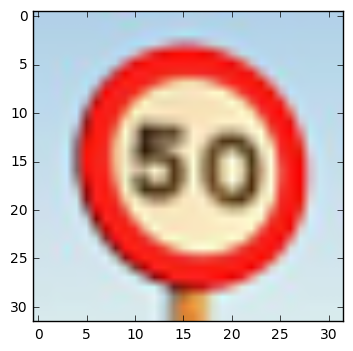

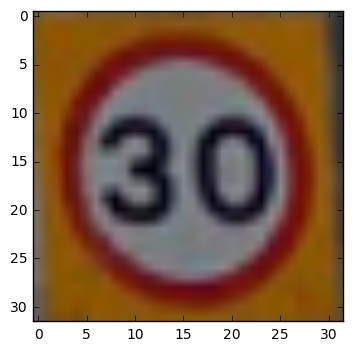

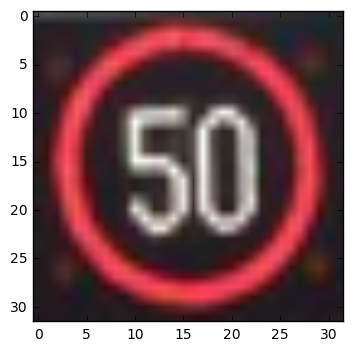

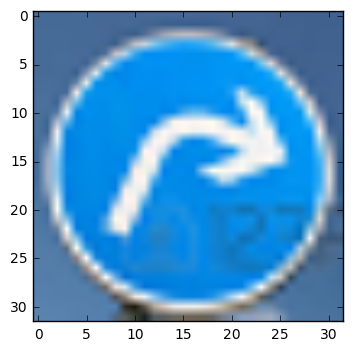

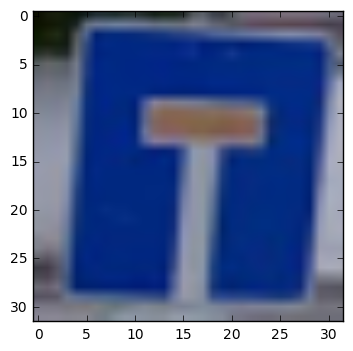

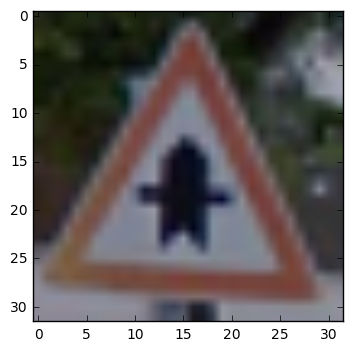

In [102]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# read in some sample images
new_images = []
image_list = ['Udacity-50sign.bmp', 'ClaytonWest-30sign.bmp', 'GantrySpeed-50limit.bmp', 'GermanRightTurn.bmp','RandomGerman1-DeadEnd.bmp', 'RandomGerman1-priority.bmp']
for i in image_list:
    ni = ndimage.imread(i)
    new_images.append(ni)
    plt.figure()
    plt.imshow(ni)


## Notes on sample images
<figure>
 <img src="UdacityImage.JPG" width="380" alt="Udacity Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> The image above is the Udacity title page image for this assignment.  It contains a nice 50mph speed limit sign.</p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="ClaytonWest.JPG" width="380" alt="Clayton West Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> The image above is a UK street scene.  Although the 30mph limit sign is actually for the side-road, this sign is detected by the speed limit detection system used by BMW when passing on the main road and therefore the speed limit is deemed to be applied to the main road (which is actually a 40mph zone).  Whilst the recognition of the sign is correct, the incorrect context identification applied by the BMW system shows an obvious limitation of camera-based/full frame sign identification.</p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="m42-gantrycamera.jpg" width="380" alt="Gantry Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> The image above is an example of a UK motorway gantry digital speed sign setup.  Whilst the speed signs are clear, the format is red-on-black rather than black-on-white and therefore differs from the typical training examples.</p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="GermanRightTurn.jpg" width="380" alt="Right Turn Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> The image above is from an internet search for typical German traffic signs. The image is angled, but this is not expected to be an issue for the identification process.</p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="RandomGerman1.JPG" width="380" alt="Ramdom Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> The image above is an example German street scene, taken from Google Maps. There are 2 signs, one priority sign and one dead-end.</p> 
 </figcaption>
</figure>
 <p></p> 

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer

The candidate images are described above and are mostly expected to be recognised with a high level of confidence.

The motorway gantry speed signs are expected to be a problem for classification, in that these electronic signs are a different format to typical speed signs (speed signs typically being black lettering on a white background with a red circle, rather than red lettering on a black background). It will be interesting to see how the classifier handles this variation in colour and whether the similar structure is sufficient to allow recognition at a reasonable level of confidence.

The side-road 30mph sign is an example where the sign can be recognised, but where the positioning of the sign is not going to be helpful for an autonomous vehicle. In this particular instance, the BMW speed-limit detection system (which is assumed to be using a forward-facing camera) detects the 30mph sign consistently - but this causes the vehicle to provide erroneous information to the driver, as the actual road speed limit is 40mph. A similar effect in a self-driving car might cause the car to brake unexpectedly (from the perspective of any following vehicles).

Besides the examples above, potential issues for classification could be lighting conditions (darkness, low sun/reflections) and the angle of the sign to the camera (giving rise to apparent distortions in the presentation of the sign vs the largely square-on training data).  Examples of these types are not present in this small sampe of new images (although the right-turn sign is slightly angled away from the camera, this is not expected to be sufficient to cause a problem for classification).

In [108]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# new_images contains the list of new images, as ndimage arrays
# need to equalise the images, as per pre-processing used before training the model
new_eq = []
for idx in range(len(new_images)):
    new_eq.append(equalise_image(new_images[idx]))
    
# get the predictions

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_dropout_150')
    feed_dict = {X: new_eq, keep_prob: 1.0}
    classification = sess.run(tf.argmax(logits, 1), feed_dict)
    
print (classification) 


/home/neil/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


[ 5  1 35 20 35 11]


## Classification results

The results on the classification of the sample images are:

1. Class #5:  speed limit 80km/h                 - expected speed limit 50 (incorrect)
2. Class #1:  speed limit 30km/h                 - expected speed limit 30 (correct)
3. Class #35: ahead only                         - expected speed limit 50 (incorrect)
4. Class #20: dangerous curve to the right       - expected right turn     (incorrect) 
5. Class #35: ahead only                         - expected dead end       (incorrect)
6. Class #11: right-of-way at next intersection  - expected right-of-way   (correct)



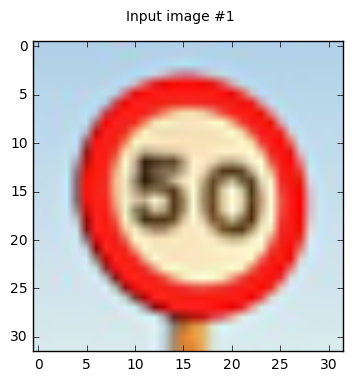

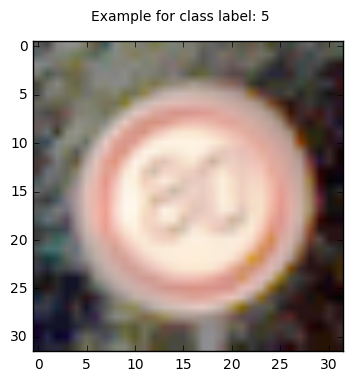

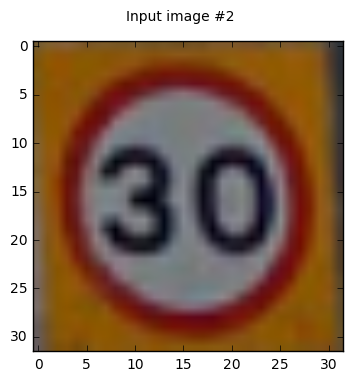

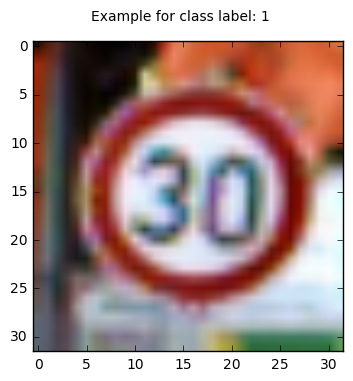

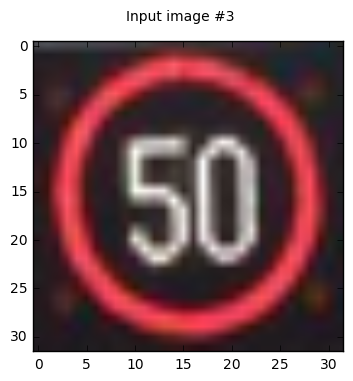

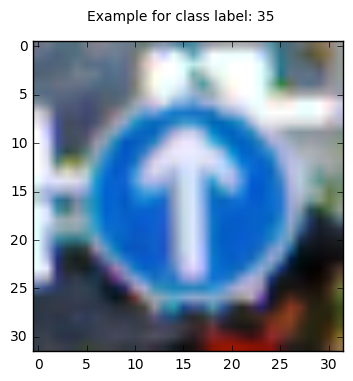

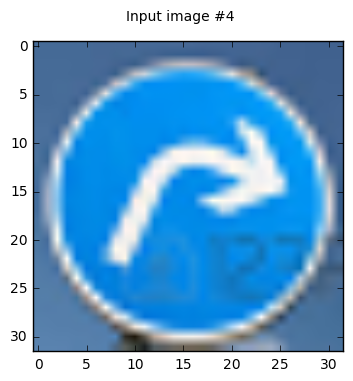

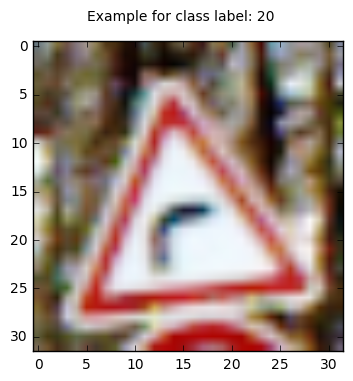

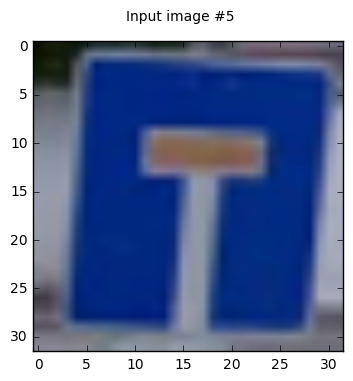

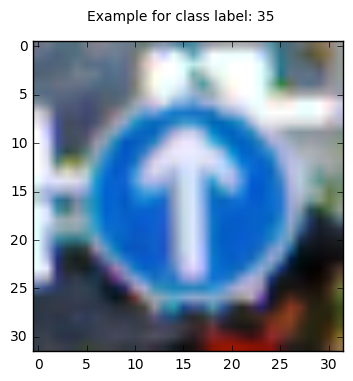

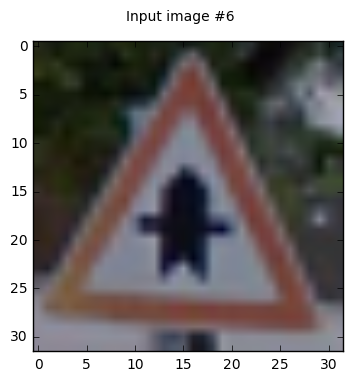

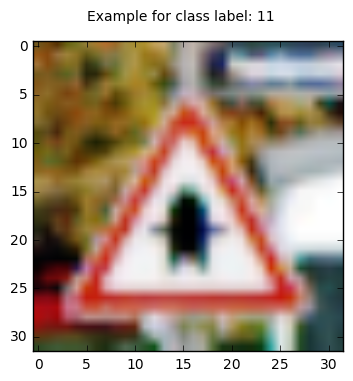

In [130]:
for i in range(len(new_images)):
    fig = plt.figure()
    fig.suptitle('Input image #' + str(i+1)) 
    plt.imshow(new_images[i])
    # find a match
    for n in range(len(training_images_2)):
        if training_labels_2[n] == classification[i]:
            fig = plt.figure()
            fig.suptitle('Example for class label: ' + str(classification[i])) 
            plt.imshow(training_images_2[n])
            break    

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model has correctly identified only 2 of 6 signs. Taking a look at each in turn, we see the following:

Image #1: 50 sign identified as an 80 sign.  Although the 50 sign is reasonably clear, it is easy to see how the shape of the '5' can be recognised as an '8' and this would lead to the observed result.

Image #2: 30 sign identified correctly.

Image #3: digital 50 sign identified as ahead only sign. The digital sign is not in the training set (UK sign, not German), so it is no surprise that the sign has not been identified correctly.  What is surprising is that the match does not appear at all similar, other than the circular shape.  

Image #4: right turn recognised as a dangerous curve sign.  These have different colours, but share the characteristic right-arrow shape.

Image #5: dead end recognised as ahead only.  The dead end sign is not in the training set, although this is a genuine German roadsign (taken from a Google Streetview image from the Munich area).  The shapes are similar.

Image #6: right of way sign identified correctly.

The model is only 33% accurate on these examples (2 of 6), or 50% accurate (2 of 4) if the two examples which are not in the training set are removed.  This is slightly disappointing, given the high levels of accuracy seen in the training/validation/test processes (in excess of 90%).

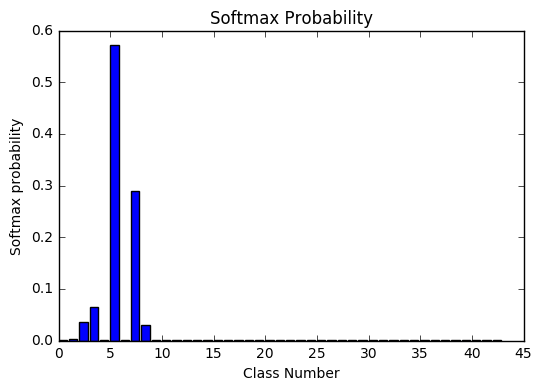

In [123]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_dropout_150')
    feed_dict = {X: new_eq, keep_prob: 1.0}
    softmax = sess.run(tf.nn.softmax(logits), feed_dict)
#print(len(softmax))
#print (softmax) 

# lets take a look at a barchart for the softmax values for the first sample image
N = len(softmax[0])
x = range(N)

fig = plt.figure()
ax = plt.subplot()
plt.bar(x, softmax[0])
ax.set_ylabel('Softmax probability')
ax.set_xlabel('Class Number')
ax.set_title('Softmax Probability')

In [128]:
# Experiment with the top_k function
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/neil/Documents/CarND-Traffic-Sign-Classifier-Project/signs_dropout_150')
    feed_dict = {X: new_eq, keep_prob: 1.0}
    feed_dict = {X: new_eq, keep_prob: 1.0}
    sm = sess.run(tf.nn.softmax(logits), feed_dict)
    top_k = sess.run(tf.nn.top_k(sm, k=3))
print(top_k)

TopKV2(values=array([[  5.71790993e-01,   2.89016664e-01,   6.39818758e-02],
       [  8.98461521e-01,   6.91936985e-02,   2.18482055e-02],
       [  7.58644760e-01,   9.73976776e-02,   8.35525766e-02],
       [  8.57089221e-01,   8.12318549e-02,   4.00466695e-02],
       [  9.81772721e-01,   4.10065241e-03,   3.53658665e-03],
       [  9.97948706e-01,   1.84840464e-03,   8.27157201e-05]], dtype=float32), indices=array([[ 5,  7,  3],
       [ 1,  6,  5],
       [35, 38, 13],
       [20, 33, 40],
       [35, 25, 20],
       [11, 38, 42]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.


**Answer:**

The bar-chart visualisation of the softmax probabilities for the first image show that the certainty was quite low - only just over 50%, with an alternative at c.30% probability. 

The top_k values for each classification with k=3 shows the 3 most likely options for each image.  

Image #1: This is the 50 speed sign mis-identified as an 80 sign. However, the second most likely option (class label 7) is for a 100 speed sign and the 3rd most likely is for a 60 sign.  The actual 50 speed limit (class 2) was at a very low (barely non-zero probability).  

Image #2: 30 sign identified correctly, with 89.8% certainty.

Image #3: digital 50 sign identified as ahead only sign. Second/third options were keep-right and yield.  The ahead-only was given 75.9% confidence, which is very high, considering that this sign is not in the training data at all. 

Image #4: right turn recognised as a dangerous curve sign, with 85.7% confidence.  Second/third options were turn right and roundabout - hence the correct sign was the second option, but only with 8.6% confidence. 

Image #5: dead end recognised as ahead only, with 98.2% confidence - very high.  Second/third options were road work and dangerous curve, but at such low confidence levels as to not be valid candidates.  

Image #6: right of way sign identified correctly with 99.8% confidence. The alternatives (keep right, end of no overtaking) are at very low confidence levels.

This analysis of confidence levels shows that the model is very confident with correct recognitions, but can also be very confident of incorrect identifications for signs which are not in the training set.  It seems possible to use confidence levels to rule out marginal identification (i.e. it may be better for a self-driving car to not recognise a sign at all, or to know that it is not certain, rather than to act on incorrect information based on a relatively low confidence level for the classification).  

What the introduction of new images seems to confirm is that the training set for a road-going implementation should contain a comprehensive representation of all signs actually used (the data set used for this project is incomplete, as shown by the dead-end sign extracted from a genuine German street scene).  Ideally a future state would be establish a standard library and then legislation which would require new street signs to be included in this standard library as part of the introduction of that new street sign.  


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.